# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['piminus_new00']
filenames1 = ['bbbar_hits0']
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR01','SecondHitPhiL01','SecondHitTheR01','SecondHitTheL01',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1','SecondHitPhiR11','SecondHitPhiL11','SecondHitTheR11','SecondHitTheL11',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2','SecondHitPhiR21','SecondHitPhiL21','SecondHitTheR21','SecondHitTheL21',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3','SecondHitPhiR31','SecondHitPhiL31','SecondHitTheR31','SecondHitTheL31')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float16')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] > 1.0) & (data['Pt'] < 4.4) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    data['The0'] = data['The0'].apply(lambda x: math.sqrt( (float) ( 1.+1./math.tan(x)/math.tan(x) ) )) 
    data['Ecore1'] = (data['Ecore']*data['The0']-data['reconpt']) / data['Ecore'] / data['The0']
    data['Ecore2'] =(data['Ecore']*data['The0']-data['Pt']) / data['Ecore'] / data['The0']
    data['Ecore'] = data['Ecore']*data['The0']
    data['reconpt1'] = (data['Pt']-data['reconpt'])/data['Pt']
    data['px'] = data['px'] * data['px'] 
    data['py'] = data['py'] * data['py'] 
    data['px'] = data['px'] + data['py']
    data['px'] = data['px']**0.5
    data.dropna()
    
    
    data.head()

In [4]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
2057449        5  1.384766 -0.293945  1.001865 -0.440674  13.335938  0.074036   
2247149        2  1.828125  3.546875  1.021092  3.662109  45.312500 -0.057709   
1737257        3  1.045898  3.564453  1.004740  3.369141 -21.421875  0.098694   
155406         3  1.315430 -0.464844  1.000504 -0.310547   7.117188 -0.076782   
1134806        3  1.237305  2.521484  1.034312  2.689453  58.187500 -0.087463   

            Ecore  Centrality  Charge  ...  SecondHitPhiL3  SecondHitTheR3  \
2057449  1.395176          25      -1  ...        -99.0000       -2.082031   
2247149  1.606426          90       1  ...        -99.0000        0.088989   
1737257  1.020439          79      -1  ...        -99.0000      -99.000000   
155406   1.376670          60       1  ...        -99.0000      -99.000000   
1134806  1.270668          48       1  ...         34.4375      -99.000000   

         SecondHitTheL3  SecondHitPhiR31  SecondHitPhiL31  SecondHitTheR31  \
2057449       -99.00000            -99.0            -99.0       -99.000000   
2247149       -99.00000              0.0            -99.0       -10.414062   
1737257       -99.00000            -99.0            -99.0       -99.000000   
155406        -99.00000            -99.0            -99.0       -99.000000   
1134806        -9.21875            -99.0            -99.0       -99.000000   

         SecondHitTheL31     Ecore1    Ecore2   reconpt1  
2057449            -99.0  -0.039436  0.007461  -0.047241  
2247149            -99.0 -15.126640 -0.138008 -13.171875  
1737257            -99.0  -0.042176 -0.024950  -0.016800  
155406             -99.0  -0.153429  0.044484  -0.207153  
1134806            -99.0  -0.424878  0.026257  -0.463379  

[5 rows x 67 columns]

In [5]:
print(data.size, data.shape)

83127369 (1240707, 67)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue0','IsTrue1','IsTrue2','IsTrue3','py','pz','vx','vy','vz','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])
data = data.drop(columns = ['SecondHitPhiL0','SecondHitTheL0','SecondHitPhiL01','SecondHitTheL01'])
data = data.drop(columns = ['SecondHitPhiL1','SecondHitTheL1','SecondHitPhiL11','SecondHitTheL11'])
data = data.drop(columns = ['SecondHitPhiL2','SecondHitTheL2','SecondHitPhiL21','SecondHitTheL21'])
data = data.drop(columns = ['SecondHitPhiL3','SecondHitTheL3','SecondHitPhiL31','SecondHitTheL31'])
data = data.drop(columns = ['NBDThit','reconphi0','Alpha','Charge', 'Arm'])

#data = data.drop(columns = ['sdphi0','sdphi1','sdphi2','sdphi3'])
#data = data.drop(columns = ['sdthe0','sdthe1','sdthe2'])

data = data.drop(columns = ['SecondHitPhiR0','SecondHitTheR0','SecondHitPhiR01','SecondHitTheR01'])
data = data.drop(columns = ['SecondHitPhiR1','SecondHitTheR1','SecondHitPhiR11','SecondHitTheR11'])
data = data.drop(columns = ['SecondHitPhiR2','SecondHitTheR2','SecondHitPhiR21','SecondHitTheR21'])
data = data.drop(columns = ['SecondHitPhiR3','SecondHitTheR3','SecondHitPhiR31','SecondHitTheR31'])

In [7]:
data.head()

Pt     Ecore  Centrality    reconpt        px    sdphi0  \
2057449  1.384766  1.395176          25   1.450195  1.419922  0.748047   
2247149  1.828125  1.606426          90  25.906250  2.804688 -0.829590   
1737257  1.045898  1.020439          79   1.063477  1.070312  0.620605   
155406   1.315430  1.376670          60   1.587891  2.220703 -0.121582   
1134806  1.237305  1.270668          48   1.810547  2.597656 -1.581055   

           sdthe0    sdphi1    sdthe1     sdphi2     sdthe2     sdphi3  \
2057449 -1.285156  0.288818  1.557617 -10.000000 -10.000000   0.855469   
2247149  1.208008 -4.437500 -1.135742 -10.000000 -10.000000   1.031250   
1737257 -2.335938  0.485840  1.115234   0.540527   0.171631 -10.000000   
155406   0.119568 -0.535156 -0.103088  -0.409424  -0.180786 -10.000000   
1134806  2.371094 -1.770508  1.410156  -3.283203   0.949707 -10.000000   

            sdthe3     Ecore1    Ecore2   reconpt1  
2057449  -0.651855  -0.039436  0.007461  -0.047241  
2247149  -0.184082 -15.126640 -0.138008 -13.171875  
1737257 -10.000000  -0.042176 -0.024950  -0.016800  
155406  -10.000000  -0.153429  0.044484  -0.207153  
1134806 -10.000000  -0.424878  0.026257  -0.463379

In [8]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 4, figsize=(15, 6))
    for i, feature in enumerate(['Pt', 'Ecore', 'Centrality', 'reconpt', 'px', 'sdphi0' ,'sdthe0', 'sdphi1' ,'sdthe1', 'sdphi2', 'sdthe2', 'sdphi3', 'sdthe3', 'Ecore1', 'reconpt1']):
        x, y = divmod(i, 4)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


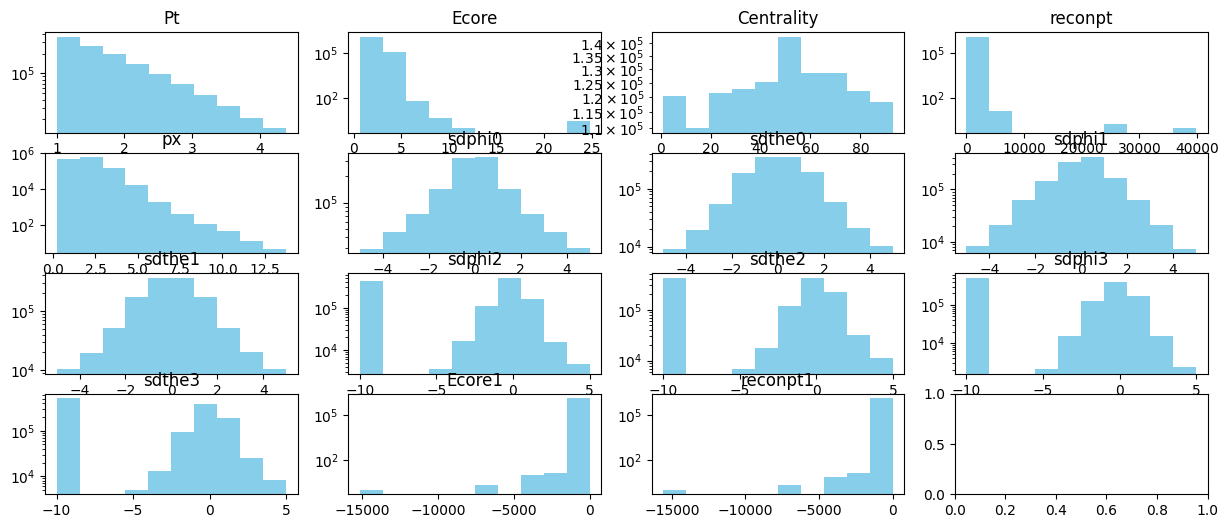

In [9]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [10]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['px']
    data = data.drop(columns = ['px'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [11]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

413569 827139


In [12]:
X_test

Pt     Ecore  Centrality   reconpt    sdphi0    sdthe0  \
760624   1.641602  1.836015           9  1.465820  1.178711  1.441406   
845078   1.429688  1.316266           9  1.300781  2.408203 -2.468750   
937105   1.300781  1.253545          87  1.413086 -0.556641 -3.869141   
521639   1.239258  1.076055          11  1.370117  1.115234  0.541016   
1649050  1.434570  1.415594          37  1.508789  0.908691  1.173828   
...           ...       ...         ...       ...       ...       ...   
1085729  1.473633  1.383115          36  2.306641  2.121094  0.562500   
1726167  1.435547  1.503087          76  1.463867 -0.103394 -3.740234   
1394562  1.436523  1.364215          61  3.556641  0.150146 -0.431152   
910671   1.124023  1.213618          83  1.152344 -0.085449  2.494141   
2114011  1.281250  1.225760          39  1.462891  1.942383  1.147461   

           sdphi1    sdthe1     sdphi2     sdthe2     sdphi3     sdthe3  \
760624   1.533203  0.397705 -10.000000 -10.000000   0.378906   3.275391   
845078   2.119141 -0.955566   0.341553  -2.074219 -10.000000 -10.000000   
937105  -0.231934 -2.914062 -10.000000 -10.000000  -1.104492  -1.827148   
521639   0.392578  0.679688   0.093506   0.164429   0.800293   0.136108   
1649050  0.413574  0.879883 -10.000000 -10.000000   0.361816  -0.602051   
...           ...       ...        ...        ...        ...        ...   
1085729  0.243530  0.758301   1.915039  -0.699219 -10.000000 -10.000000   
1726167  0.175781 -2.181641   0.334961   0.130249  -0.429443  -1.382812   
1394562 -1.424805  0.284180   3.210938  -0.329834 -10.000000 -10.000000   
910671   0.036285  0.054688  -0.937012   1.822266 -10.000000 -10.000000   
2114011  0.893555  1.031250 -10.000000 -10.000000  -0.450684  -0.922363   

           Ecore1    Ecore2  reconpt1  
760624   0.201630  0.105889  0.107056  
845078   0.011764 -0.086169  0.090149  
937105  -0.127272 -0.037682 -0.086365  
521639  -0.273278 -0.151667 -0.105591  
1649050 -0.065835 -0.013406 -0.051727  
...           ...       ...       ...  
1085729 -0.667714 -0.065445 -0.565430  
1726167  0.026093  0.044934 -0.019730  
1394562 -1.607097 -0.053004 -1.476562  
910671   0.050489  0.073825 -0.025192  
2114011 -0.193456 -0.045270 -0.141724  

[413568 rows x 15 columns]

In [13]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [14]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
gb_clf = GradientBoostingRegressor(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
#print(metrics.classification_report(y_test, predicted))

#print('confusion matrix')
#print(metrics.confusion_matrix(y_test, predicted))

In [15]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":['squared_error'],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[50],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[200]
    }

classif = GradientBoostingRegressor()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(init='zero'), n_jobs=8,
             param_grid={'criterion': ['squared_error'], 'learning_rate': [0.2],
                         'loss': ['squared_error'], 'max_depth': [50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [0.01], 'n_estimators': [200]})

In [16]:

print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.6958177999572672
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'squared_error', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 200}
0.6908889235443635
time of execution (sec) 1286.390305519104


# Cross Validation

In [17]:
predicted = clf.predict(X_test)
print(metrics.r2_score(y_test, predicted))

0.6958177999572672


In [18]:
y_pred = clf.predict(X_test)

# Model Evaluation

In [19]:
kek_data = data
kek_data = kek_data.drop(columns = ['px'])
proba_loc = clf.predict(kek_data)
print(proba_loc[0])

1.4530903395076538


In [20]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_pt.root", "recreate")
pt_hist_AI = root.TH3D("pt_hist_AI", "pt_hist_AI", 100, -1, 1, 100, 0, 10, 10, 0, 100)
pt_hist_DC = root.TH3D("pt_hist_DC", "pt_hist_DC", 100, -1, 1, 100, 0, 10, 10, 0, 100)
pt_hist_DF = root.TH3D("pt_hist_DF", "pt_hist_DF", 100, -1, 1, 100, 0, 10, 10, 0, 100)

Welcome to JupyROOT 6.30/06


In [21]:
mycute,mycuth, AIcute, AIcuth = 0, 0, 0, 0
norm_e, norm_h = 0, 0
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>25000000: break
    centrality, pt, px = row['Centrality'], row['Pt'], row['px']

    if pt<0.4 or centrality<0: continue

    pt_hist_AI.Fill(proba_loc[counter]-px,px,centrality)
    pt_hist_DC.Fill(pt-px,px,centrality)
    pt_hist_DF.Fill(proba_loc[counter]-pt,px,centrality)

In [22]:
%run input/Format.ipynb

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [23]:
import pickle
with open('output/bdt_pt.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1.45309034 2.41025975 1.09059326 1.58014581 1.93927352 3.01281504
 1.34536675 0.96826292 2.84778562 2.53125445]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


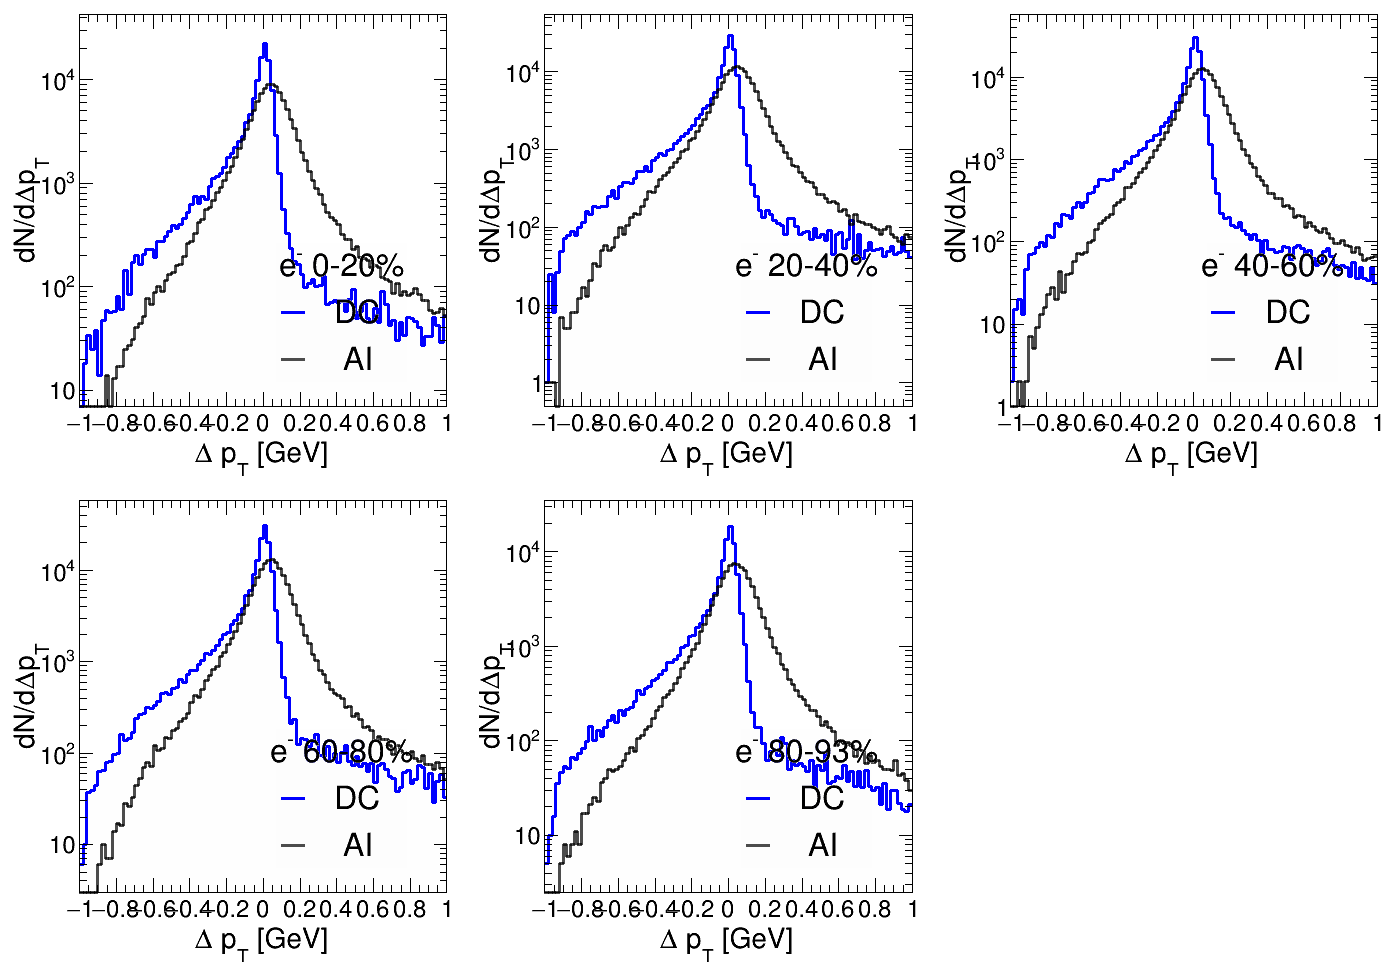

In [30]:
c1 = root.TCanvas("c1","c1",1400,1000)
c1.Divide(3,2)
part_names_legend= [ "e^{-} " , "#pi^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+icentr)
    root.gPad.SetLogy()
    pt_hist_DC_proj = pt_hist_DC.ProjectionX(f"pt_hist_DC_{icentr}",10,20,1+2*icentr,2+2*icentr)
    pt_hist_AI_proj = pt_hist_AI.ProjectionX(f"pt_hist_AI_{icentr}",10,20,1+2*icentr,2+2*icentr)
    pt_hist_DF_proj = pt_hist_DF.ProjectionX(f"pt_hist_DF_{icentr}",10,20,1+2*icentr,2+2*icentr)

    Format_Hist_total(pt_hist_DC_proj, title_x="#Delta p_{T} [GeV]",  title_y="dN/d#Deltap_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    Format_Graph(pt_hist_AI_proj,22,0,1,3,1, Lalpha=0.7)
    Format_Graph(pt_hist_DF_proj,23,0,2,3,2, Lalpha=0.7)
    pt_hist_DC_proj.Draw()
    pt_hist_AI_proj.Draw("same")
    #pt_hist_DF_proj.Draw("same")

    legends.append(Draw_Legend_Title(0.6,0.2,0.9,0.5,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(pt_hist_DC_proj,"DC","l")
    legends[-1].AddEntry(pt_hist_AI_proj,"AI","l")
    #legends[-1].AddEntry(pt_hist_DF_proj,"sum","l")
    legends[-1].Draw()

c1.Draw()

In [25]:
if False:
    pt_hist_AI.Write()
    pt_hist_DC.Write()
    pt_hist_DF.Write()
    outfile.Close()

In [26]:
import pickle
# load
with open('output/bdt_pt.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1.45309034 2.41025975 1.09059326 1.58014581 1.93927352 3.01281504
 1.34536675 0.96826292 2.84778562 2.53125445]


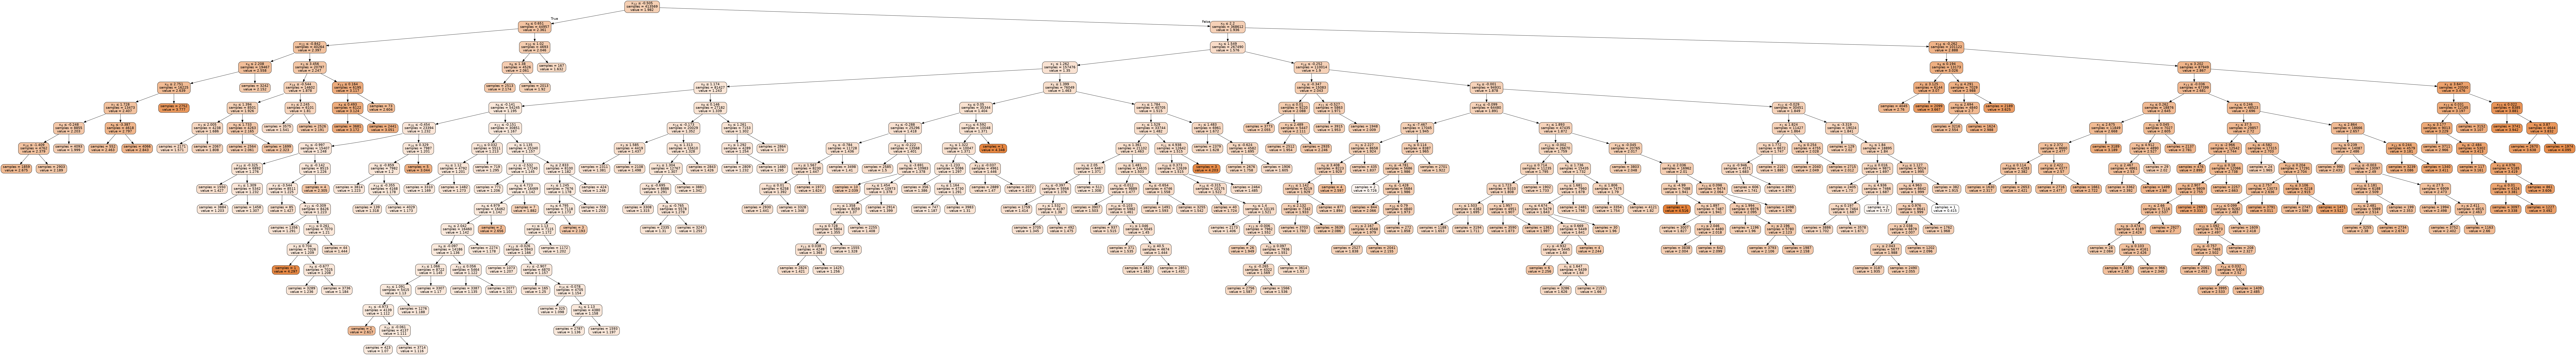

In [27]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [28]:
clf2.predict(kek_data[0:100])

array([1.45309034, 2.41025975, 1.09059326, 1.58014581, 1.93927352,
       3.01281504, 1.34536675, 0.96826292, 2.84778562, 2.53125445,
       1.83544092, 1.37836771, 4.00189835, 1.52610228, 2.44739246,
       1.75695736, 1.20598623, 1.79596832, 1.21182441, 1.6681236 ,
       2.29702089, 1.91884656, 2.43886722, 1.60180438, 2.69448223,
       1.38552171, 1.3860337 , 1.21450506, 1.91974504, 1.78799557,
       1.81302179, 1.55928357, 1.09935729, 1.80041654, 0.98784812,
       2.40286379, 2.41888584, 2.81941232, 1.77812028, 2.356808  ,
       1.23154248, 1.30711983, 2.27494929, 4.32262364, 1.26484071,
       2.24730434, 3.02395892, 1.64368477, 1.39947394, 1.18968571,
       1.8074917 , 1.42038186, 1.17648258, 1.90810408, 1.09868586,
       2.10062345, 1.58411898, 1.38850379, 2.13083919, 2.66000674,
       1.42504089, 1.30271891, 1.47658468, 1.53859422, 1.50401412,
       2.03568899, 1.39079196, 1.88056567, 1.19853296, 1.21060762,
       1.42097641, 1.07771313, 3.13909991, 1.97824977, 1.36625

In [29]:
clf2.predict_proba(kek_data[0:100])

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'

In [ ]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 0.01, 'n_estimators': 20}


In [ ]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.07672582, 0.92327418],
       [0.94052226, 0.05947774],
       [0.96925715, 0.03074285],
       [0.9255942 , 0.0744058 ],
       [0.95790885, 0.04209115],
       [0.17484507, 0.82515493],
       [0.90801663, 0.09198337],
       [0.97470102, 0.02529898],
       [0.96998563, 0.03001437],
       [0.96542442, 0.03457558],
       [0.68789436, 0.31210564]])

In [ ]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[ 1.94127665 -2.35907336 -2.36641299 -1.76645893 -2.3498593   0.48130882
 -1.21224177 -2.3937125  -2.45371886 -2.35907336]
[-3.69741832 -3.20457348 -4.43349033 -3.12136151 -3.39189598 -3.78777519
 -3.09513097 -3.81029894 -4.23134002 -3.26306616 -2.83861437]
[0.87449233 0.08634727 0.08576999 0.14598325 0.08707696 0.61805689
 0.22930464 0.08365341 0.07916702 0.08634727]


In [ ]:
best_gbc = clf2.best_estimator_

In [ ]:
n_estim = best_gbc.n_estimators

In [ ]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[ 2.48768796 -2.76083312 -3.45087239 -2.520902   -3.12491509  1.55167093
 -2.28965489 -3.65136666 -3.47560485 -3.32942029]
[0.92327418 0.05947774 0.03074285 0.0744058  0.04209115 0.82515493
 0.09198337 0.02529898 0.03001437 0.03457558]
0.2


In [ ]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [ ]:
print(log_odds_predictions)

[[-1.200624512099922, -1.8972357767003818, -1.9895663205743614, -1.6814882493274452, -1.8959555879763763, -0.34568836462673375, -1.8551203846226936, -1.9345894979262641, -1.9106729177434207, -1.8972357767003818], [-0.9171851259767482, -1.5823254008503425, -1.587503998644066, -1.542846112360411, -1.587503998644066, -0.8388272699490528, -1.5823254008503425, -1.587503998644066, -1.578659801324435, -1.5823254008503425], [1.826983590463873, -1.342027522547931, -1.3798789331792816, -1.3693805745914267, -1.3310208634481397, 1.826983590463873, -1.3291769712940058, -1.3985833963429382, -1.376432121760617, -1.342027522547931], [0.2056563634540976, -1.215986289370081, -1.280018789147165, -1.252056182527864, -1.2261853528178022, 0.0481771596605836, -1.2110563970128718, -1.2419598891099737, -1.3193633222306484, -1.215986289370081], [1.8680051722267956, -1.1633336642755425, -1.1183188238434474, -0.5345410942307353, -1.1520258824134673, 1.8680051722267956, -0.9635131780834657, -1.1633336642755425, -1

In [ ]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 1.9412766546472733
[ 2.48768796 -2.76083312 -3.45087239 -2.520902   -3.12491509  1.55167093
 -2.28965489 -3.65136666 -3.47560485 -3.32942029]


In [ ]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

20
1
[[-1.200624512099922, -0.9171851259767482, 1.826983590463873, 0.2056563634540976, 1.8680051722267956, 1.6829132038178136, 1.3978147757965822, 1.3103207102666945, 1.6467431067430889, 1.88575598854409, 1.1536355145443369, 0.8152277437942979, 0.5149847061741806, 0.2617318927990144, 0.9355408312636289, -0.3265557729248271, -0.12416538134348659, 0.7468589834332378, -0.9184963061898156, -0.32670569801241695], [-1.8972357767003818, -1.5823254008503425, -1.342027522547931, -1.215986289370081, -1.1633336642755425, -1.0756564849721666, -1.0074518401169066, -0.9259988852057675, -0.8587809061735233, -0.7265700209338551, -0.7530025649335593, -0.5900907361753928, -0.6051274394850223, -0.6329447146296465, 1.5253392697599892, -0.5001264035722037, -0.44779986646729886, -0.3771992017635802, -0.19504832427241817, 0.567201188755075], [-1.9895663205743614, -1.587503998644066, -1.3798789331792816, -1.280018789147165, -1.1183188238434474, -1.0586109465745617, -0.9367492494761868, -0.8649203507747674, -0

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'sdphi0', 'sdthe0', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'sdphi1', 'sdthe1', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'sdphi2', 'sdthe2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'sdphi3', 'sdthe3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
35


In [ ]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (x[25] > -99.03125) if (x[14] <= 55.01562) if (x[0] <= 5.5) if (x[1] <= 1.22705) if (x[15] > -157.1875) if (x[13] > -99.03125) if (x[30] <= -7.5) if (x[23] > -4.90039) if (x[11] <= 0.86597)   return -1.8959555879763763;  // | based on 302,416 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (x[25] > -99.03125) if (x[14] <= 55.01562) if (x[0] <= 5.5) if (x[1] <= 1.22705) if (x[15] > -157.1875) if (x[13] > -99.03125) if (x[30] > -7.5) if (x[0] > 2.5) if (x[24] <= -2.33496)   return -1.8972357767003818;  // | based on 203,119 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] > 2.02051) if (x[15] > 0.05089) if (x[6] > -0.04008) if (x[11] <= 2.79004) if (x[18] > -1.18408) if (x[13] <= 43.32812)   return 2.0;  // | based on 201,359 samples
        if  (x[22] <= -25.88281) if (x[19] <= -16.72656) if (x[1] <= 2.02051) if (

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 5)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 5)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] <= 2.02051) and (x[25] > -99.03125) and (x[14] <= 55.01562) and (x[0] <= 5.5) and (x[1] <= 1.22705) and (x[15] > -157.1875) and (x[13] > -99.03125) and (x[30] <= -7.5) and (x[23] > -4.90039) and (x[11] <= 0.86597) :  return -1.8959555879763763  # | based on 302,416 samples
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] <= 2.02051) and (x[25] > -99.03125) and (x[14] <= 55.01562) and (x[0] <= 5.5) and (x[1] <= 1.22705) and (x[15] > -157.1875) and (x[13] > -99.03125) and (x[30] > -7.5) and (x[0] > 2.5) and (x[24] <= -2.33496) :  return -1.8972357767003818  # | based on 203,119 samples
        if (x[22] <= -25.88281) and (x[19] <= -16.72656) and (x[1] > 2.02051) and (x[15] > 0.05089) and (x[6] > -0.04008) and (x[11] <= 2.79004) and (x[18] > -1.18408) and (x[13] <= 43.32812) :  return 2.0  # | based on 201,359 samples
        if (x[22] <= -25.88281) and (x[19

In [ ]:
def mytree(x,y):
    return 0

In [ ]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [ ]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[ 1.88575599 -0.72657002 -0.76234702  0.18790994 -0.93098879 -0.66466124
  4.73576223 -0.80251329 -0.88380734 -0.72657002]
[1.8857559885440898, -0.7265700209338551, -0.7623470226329747, 0.1879099445346337, -0.9309887901848545, -0.6646612392445693, 4.735762228993647, -0.8025132900800463, -0.8838073380277853, -0.7265700209338551]


In [ ]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[[0.07672582 0.92327418]
 [0.94052226 0.05947774]
 [0.96925715 0.03074285]
 [0.9255942  0.0744058 ]
 [0.95790885 0.04209115]
 [0.17484507 0.82515493]
 [0.90801663 0.09198337]
 [0.97470102 0.02529898]
 [0.96998563 0.03001437]
 [0.96542442 0.03457558]]
[0.9232741801306895, 0.05947774419726638, 0.03074285341656859, 0.07440580097390123, 0.04209115136676752, 0.8251549348771924, 0.09198336995736425, 0.025298980961941202, 0.030014374149645494, 0.03457557581298993]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
